# Task 1: Using Markdown Language:
---
**Jivraj Grewal:** *Task 1,* showing you how markdown language can manipulate the wayn things look on the file.

**[Click here to get rick rolled](https://www.youtube.com/watch?v=dQw4w9WgXcQ)**

# Task 4 EDA:

In [1]:
import sys
sys.path.append("../scripts")
import project_functions
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

path = "../../data/raw/Medical_Cost.csv"

%matplotlib inline
#or
print("\nUsing project_funtions")
df2 = project_functions.load_data(path)
df2.info()
df2.describe().T
df2.head()


Using project_funtions
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 940 to 1241
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 67.9+ KB


,age,sex,bmi,children,smoker,region,charges
940,18,male,23.21,0,no,southeast,1121.8739
808,18,male,30.14,0,no,southeast,1131.5066
1244,18,male,33.33,0,no,southeast,1135.9407
663,18,male,33.66,0,no,southeast,1136.3994
22,18,male,34.10,0,no,southeast,1137.0110


In [2]:
#EDA begins

df2.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


## Pair Plot

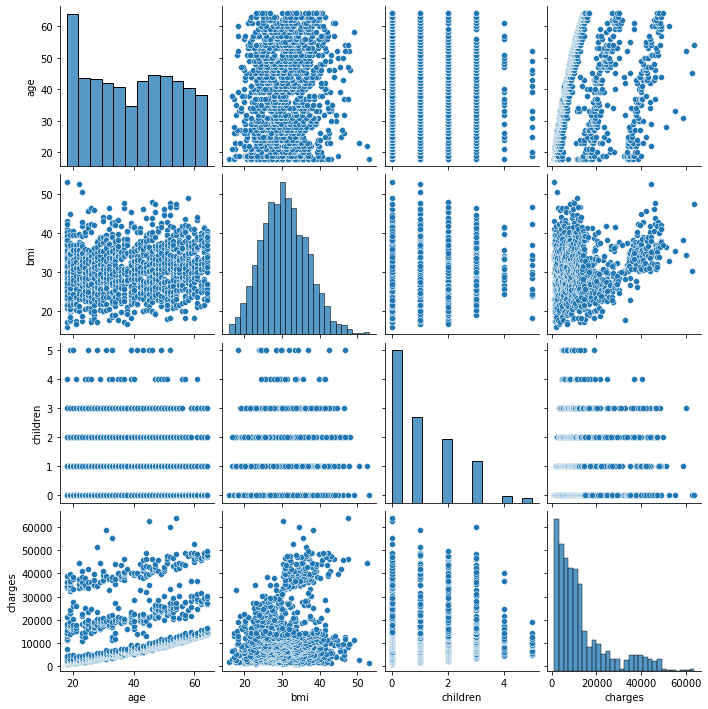

In [3]:
sns.pairplot(df2)

## Scatterplot of BMI vs Costs
***Shows relationship between two variables and identifies outliers.*** In this scatter plot we can see there is a relationship between costs and bmi. What we can gather from this visualization is that there is some type of reltionship in that the higher the bmi gets the more the person will have to pay in medical bills. Also, there are some ouliers in the respective bmi columns 

<AxesSubplot:xlabel='bmi', ylabel='charges'>

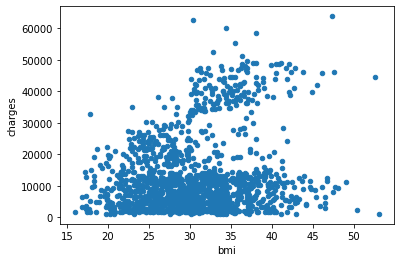

In [4]:
df2.plot(kind='scatter', x='bmi', y='charges')

## Barplot of Regions vs Costs
***Shows which region has the largest cost.*** The assumption I had was that there would be a difference in costs among the different regions but looking at the barplot below we can see that it is almost similar across each region with a minor difference in costs. 

<AxesSubplot:xlabel='region', ylabel='charges'>

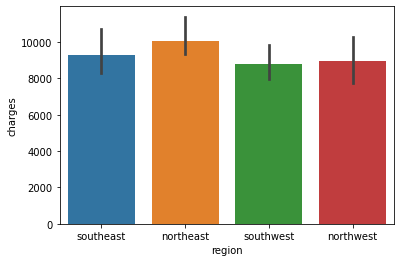

In [5]:
sns.barplot(x='region',y='charges',data=df2, estimator=np.median)

## Heatmap of Medical data:
***shows the correlation coefficients between many variables.*** Looking at the heat map below we can see the correlation between all of the varibles in the data. We can see that all of the correlations are postive because if we compare cost to the number of children and bmi it means that the cost will be higher if you have more children and a higher bmi.

<AxesSubplot:>

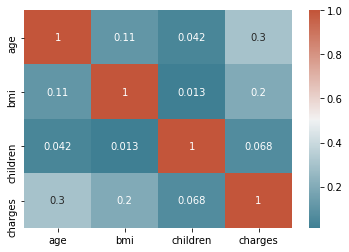

In [6]:
corr = df2.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [7]:
df2['bmi category'] = pd.cut(df2.bmi, bins = [10, 18.5, 25, 30, 40], labels = ['under weight', 'healthy', 'over weight', 'obese'])
df2.head()

,age,sex,bmi,children,smoker,region,charges,bmi category
940,18,male,23.21,0,no,southeast,1121.8739,healthy
808,18,male,30.14,0,no,southeast,1131.5066,obese
1244,18,male,33.33,0,no,southeast,1135.9407,obese
663,18,male,33.66,0,no,southeast,1136.3994,obese
22,18,male,34.10,0,no,southeast,1137.0110,obese


In [8]:
df2['age category'] = pd.cut(df2.age, bins = [17, 25, 40, 55, 65], labels= ['17-25', '25-40', '40-55', '55-65'])
df2.head()

,age,sex,bmi,children,smoker,region,charges,bmi category,age category
940,18,male,23.21,0,no,southeast,1121.8739,healthy,17-25
808,18,male,30.14,0,no,southeast,1131.5066,obese,17-25
1244,18,male,33.33,0,no,southeast,1135.9407,obese,17-25
663,18,male,33.66,0,no,southeast,1136.3994,obese,17-25
22,18,male,34.10,0,no,southeast,1137.0110,obese,17-25


In [9]:
df2['charge range'] = pd.cut(df2.charges, bins = [0, 20000, 40000, 60000, 80000], labels= ['0-20000', '20000-40000', '400000-60000', '<60000'])
df2.head()

,age,sex,bmi,children,smoker,region,charges,bmi category,age category,charge range
940,18,male,23.21,0,no,southeast,1121.8739,healthy,17-25,0-20000
808,18,male,30.14,0,no,southeast,1131.5066,obese,17-25,0-20000
1244,18,male,33.33,0,no,southeast,1135.9407,obese,17-25,0-20000
663,18,male,33.66,0,no,southeast,1136.3994,obese,17-25,0-20000
22,18,male,34.10,0,no,southeast,1137.0110,obese,17-25,0-20000


## BMI column

In [10]:
df2.groupby("bmi category").charges.agg(['min', 'max', 'mean'])

,min,max,mean
bmi category,,,
under weight,1621.3402,32734.18630,8657.620652
healthy,1121.8739,35069.37452,10435.440719
over weight,1252.4070,38245.59327,10997.803881
obese,1131.5066,62592.87309,15379.565215


***looking from this chart the higher the bmi the higher the average cost***

<AxesSubplot:xlabel='bmi category', ylabel='charges'>

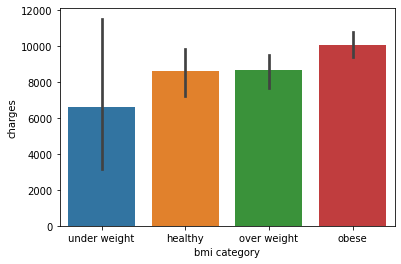

In [11]:
sns.barplot(x='bmi category',y='charges',data=df2, estimator=np.median)

***Obese people have to pay more in medical costs than under weight. While healthy and overweight people almost pay the same***

## BMI Sex and Charges

<AxesSubplot:xlabel='bmi', ylabel='charges'>

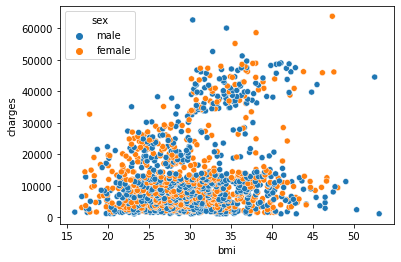

In [12]:
sns.scatterplot(data=df2, x='bmi', y="charges", hue='sex')

***Looks like an equal spread so no correlation of bmi and sex***

## BMI Region and Charges

<AxesSubplot:xlabel='bmi', ylabel='charges'>

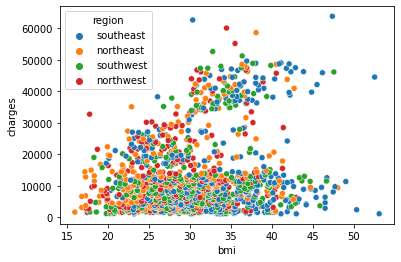

In [13]:
sns.scatterplot(data=df2, x='bmi', y="charges", hue='region')

***Spread very evenly so no correlation***

## BMI Smoker and Charges

<AxesSubplot:xlabel='bmi', ylabel='charges'>

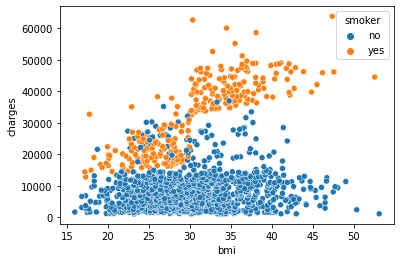

In [14]:
sns.scatterplot(data=df2, x='bmi', y="charges", hue='smoker')

***It seems that if the person is a smoker they will have a higher cost but they all range the same bmi.***

## BMI Age and Charges

<AxesSubplot:xlabel='bmi', ylabel='charges'>

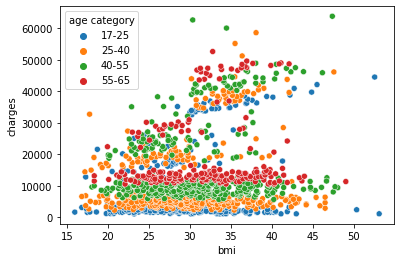

In [15]:
sns.scatterplot(data=df2, x='bmi', y="charges", hue='age category')

***people who are older range above and pay more in medical bills but the scatter looks very spread out***

## Regions Column

In [16]:
df2.groupby("region").charges.agg(['min', 'max', 'mean'])

,min,max,mean
region,,,
northeast,1694.7964,58571.07448,13406.384516
northwest,1621.3402,60021.39897,12417.575374
southeast,1121.8739,63770.42801,14735.411438
southwest,1241.5650,52590.82939,12346.937377


***We can see that the data shows that costs are almost the same across the regions with south east having a slight higher average.*** 

## Regions and Charge

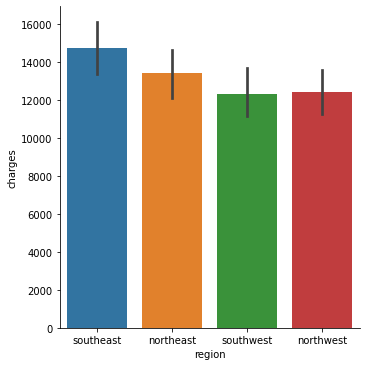

In [17]:
sns.catplot(x='region', y='charges', kind='bar', data=df2)

***Looks like southeast has the highest charge by the smallest bit*** 

## Regions Sex and Charges

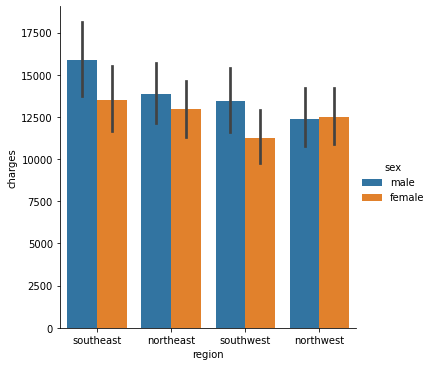

In [18]:
sns.catplot(x='region', y='charges', hue='sex', kind='bar', data=df2)

***Looks like men have to pay a slight bit more than females. But across all regions bot sexs pay similar amounts***

## Regions BMI and Charges

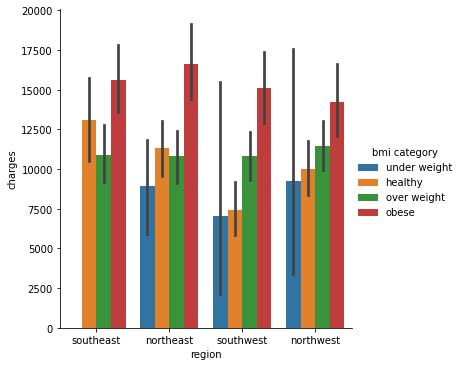

In [19]:
sns.catplot(x='region', y='charges', hue='bmi category', kind='bar', data=df2)

***It looks like obese people have to pay the mosts across the regions.***

## Regions Smoker and Charges

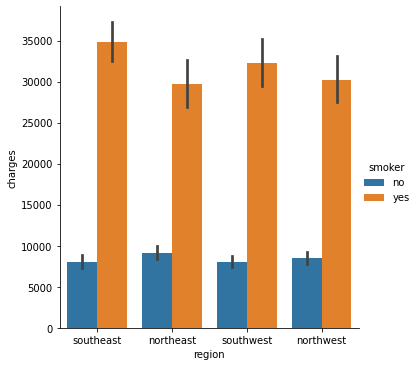

In [20]:
sns.catplot(x='region', y='charges', hue='smoker', kind='bar', data=df2)

***If the person is a smoker the will have to pay more regardless the region***